### Troubleshooting NYC 311 

The NYC 311 mobile app "Request" section doesn't include an internal app form. 

#### How to File an E-Scooter Complaint
- Start here: https://portal.311.nyc.gov/article/?kanumber=KA-03442

The mobile app user enters "e-scooter" or "scooter", clicks "Search 311 Online for >", sent to the 311 website (online), click "Shared E-Scooter Pilot, scroll down and click "Parking Complaints and Maintenance, scroll down and click "Report a problem with an e-scooter or parking corral and sent to the "E-Scooter Complaint" form. *There's no direct link to file a complaint*

Data shows why **Phone** is the preferred option.

### E-Scooter Complaint Fields

Although a users enters "Additional Details", the e-scooter company's name, the values are not reflected in the dataset.

*NYC 311 Open Data Response*

> We appreciate your interest in Open Data! You are correct, the name of company is collected on the client side, but it is in inputted as an “Additional Detail” and that field is not part of the open dataset at this time. However, it should be noted that not all service requests have an “additional detail” field and that your request for one in the dataset may be considered when reviewing the next set of enhancements for the dataset.

The "Is this a recurring problem?" too doesn't appear in the dataset

---

### Dataset in JSON 

[Per Wikipedia, JSON is](https://en.wikipedia.org/wiki/JSON):

> a data interchange format, that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and array data types (or any other serializable value)

In [31]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import requests library to make a web request to the URL.
%pip install requests
import requests

Note: you may need to restart the kernel to use updated packages.


In [33]:
#just a string
open_data_channel_type_mobile_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?borough=BRONX&open_data_channel_type=MOBILE"

#making a request to the webpage at the url
response = requests.get(open_data_channel_type_mobile_url)

open_data_channel_type_mobile_data = response.json()
# open_data_channel_type_mobile_data

In [34]:
#just a string
complaint_type_e_scooter_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?borough=BRONX&complaint_type=E-Scooter"

#making a request to the webpage at the url
response = requests.get(complaint_type_e_scooter_url)

# give us the json form of the response
complaint_type_e_scooter_data = response.json()

In [35]:
# Shorten
e_scooter = complaint_type_e_scooter_data

### Import Libraries
- Import `altair` and `pandas` and assign them aliases (`alt` and `pd`) for easier access.
     - Altair is our charting library
     - Pandas will help us explore and prepare our data

### Why use Altair?

- [Altair's API](https://altair-viz.github.io/user_guide/data.html) is much simpler, but just as powerful. It brings to Python ideas of a "visualization grammar", similar to [JavaScript's Vega package](https://vega.github.io/vega/) and [R's ggplot2](https://ggplot2.tidyverse.org).

- Altair allows us to create visualization declaratively by mapping data to visual components.

In [36]:
%pip install altair vega_datasets
import altair as alt
# from vega_datasets import data

Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip install pandas datetime
import pandas as pd
import datetime as dt

print(pd.__version__)

Note: you may need to restart the kernel to use updated packages.
1.5.1


In [38]:
df = pd.DataFrame(e_scooter)
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,56014728,2022-11-17T08:31:30.000,2022-11-17T09:15:44.000,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10472,1327 CROES AVENUE,...,2038710058,BRONX,1019812,242800,PHONE,Unspecified,BRONX,40.83303369910096,-73.87149086851551,"{'latitude': '40.83303369910096', 'longitude':..."
1,56011961,2022-11-16T12:18:38.000,2022-11-17T09:20:24.000,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10469,1263 BURKE AVENUE,...,2046190006,BRONX,1025630,256720,PHONE,Unspecified,BRONX,40.87121456687827,-73.85038068939417,"{'latitude': '40.87121456687827', 'longitude':..."
2,55990649,2022-11-14T22:43:51.000,2022-11-15T10:32:30.000,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10456,1346 FINDLAY AVENUE,...,2027820027,BRONX,1009108,244030,ONLINE,Unspecified,BRONX,40.83644630655205,-73.91016694046635,"{'latitude': '40.83644630655205', 'longitude':..."
3,55983150,2022-11-14T17:07:28.000,2022-11-15T10:43:00.000,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10467,ARNOW AVENUE,...,NaN,BRONX,1020959,255501,PHONE,Unspecified,BRONX,40.867889449868514,-73.86727646042412,"{'latitude': '40.867889449868514', 'longitude'..."
4,55984668,2022-11-14T16:47:30.000,2022-11-15T10:38:52.000,DOT,Department of Transportation,E-Scooter,Improperly Parked or Abandoned,Sidewalk,10473,2242 VIRGIL PLACE,...,2036140049,BRONX,1026468,239038,PHONE,Unspecified,BRONX,40.822678789552015,-73.84746203644735,"{'latitude': '40.822678789552015', 'longitude'..."


In [39]:
df.groupby('community_board').agg(list)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
community_board,,,,,,,,,,,,,,,,,,,,,
01 BRONX,"[54997713, 53979759, 51689302]","[2022-08-02T12:44:02.000, 2022-04-22T16:47:41....","[2022-08-03T11:58:01.000, 2022-04-25T11:11:37....","[DOT, DOT, DOT]","[Department of Transportation, Department of T...","[E-Scooter, E-Scooter, E-Scooter]","[Improperly Parked or Abandoned, Improperly Pa...","[Private Property, Sidewalk, Street]","[10455, 10454, 10455]","[694 EAST 149 STREET, 411 EAST 140 STREET, E...",...,"[2025570083, 2022850081, nan]","[BRONX, BRONX, BRONX]","[1009298, 1006066, 1007046]","[235603, 234426, 236603]","[PHONE, PHONE, PHONE]","[Unspecified, Unspecified, Unspecified]","[BRONX, BRONX, BRONX]","[40.81331606172984, 40.810094097993506, 40.816...","[-73.90951176861012, -73.92119148807862, -73.9...","[{'latitude': '40.81331606172984', 'longitude'..."
03 BRONX,[52905305],[2021-12-27T16:53:24.000],[2021-12-29T08:40:56.000],[DOT],[Department of Transportation],[E-Scooter],[Improperly Parked or Abandoned],[Private Property],[10457],[1591 FULTON AVENUE],...,[2029290028],[BRONX],[1012069],[244810],[PHONE],[Unspecified],[BRONX],[40.83857834804812],[-73.89946310715604],"[{'latitude': '40.83857834804812', 'longitude'..."
04 BRONX,[55990649],[2022-11-14T22:43:51.000],[2022-11-15T10:32:30.000],[DOT],[Department of Transportation],[E-Scooter],[Improperly Parked or Abandoned],[Sidewalk],[10456],[1346 FINDLAY AVENUE],...,[2027820027],[BRONX],[1009108],[244030],[ONLINE],[Unspecified],[BRONX],[40.83644630655205],[-73.91016694046635],"[{'latitude': '40.83644630655205', 'longitude'..."
05 BRONX,"[54042888, 51711389, 51655668]","[2022-04-29T16:29:10.000, 2021-09-01T08:29:13....","[2022-05-03T08:56:26.000, 2021-09-02T14:31:13....","[DOT, DOT, DOT]","[Department of Transportation, Department of T...","[E-Scooter, E-Scooter, E-Scooter]","[Improperly Parked or Abandoned, Improperly Pa...","[Private Property, Sidewalk, Sidewalk]","[10453, 10453, 10453]","[1 WEST 182 STREET, 1833 LORING PLACE, DAVIDS...",...,"[2031960038, 2028790085, nan]","[BRONX, BRONX, BRONX]","[1010578, 1007548, 1008326]","[251563, 249943, 248396]","[ONLINE, ONLINE, PHONE]","[Unspecified, Unspecified, Unspecified]","[BRONX, BRONX, BRONX]","[40.85711790191046, 40.85268000300874, 40.8484...","[-73.90482500833433, -73.91578399752775, -73.9...","[{'latitude': '40.85711790191046', 'longitude'..."
06 BRONX,"[54953548, 52458023, 51668521]","[2022-07-29T16:52:45.000, 2021-11-08T16:38:20....","[2022-08-01T09:03:45.000, 2021-11-09T09:25:17....","[DOT, DOT, DOT]","[Department of Transportation, Department of T...","[E-Scooter, E-Scooter, E-Scooter]","[Improperly Parked or Abandoned, Improperly Pa...","[Park, Building Entrance, Street]","[10460, 10460, 10458]","[2133 BOSTON ROAD, 1956 CROTONA PARKWAY, 2475 ...",...,"[2031380001, 2029850038, 2031150021]","[BRONX, BRONX, BRONX]","[1018094, 1015982, 1017172]","[246592, 246199, 251088]","[ONLINE, PHONE, PHONE]","[Unspecified, Unspecified, Unspecified]","[BRONX, BRONX, BRONX]","[40.8434483786708, 40.84237755161368, 40.85579...","[-73.87768000083155, -73.88531510513788, -73.8...","[{'latitude': '40.8434483786708', 'longitude':..."
07 BRONX,"[55959146, 55391891]","[2022-11-11T12:16:58.000, 2022-09-13T19:56:20....","[2022-11-15T10:18:20.000, 2022-09-14T15:30:53....","[DOT, DOT]","[Department of Transportation, Department of T...","[E-Scooter, E-Scooter]","[Improperly Parked or Abandoned, Improperly Pa...","[Sidewalk, Sidewalk]","[10467, 10458]","[3561 ROCHAMBEAU AVENUE, HULL AVENUE]",...,"[2033280165, nan]","[BRONX, BRONX]","[1017733, 1017164]","[260941, 256597]","[PHONE, ONLINE]","[Unspecified, Unspecified]","[BRONX, BRONX]","[40.882833384966496, 40.8709125987586]","[-73.87891304856944, -73.88099210376514]","[{'latitude': '4

In [40]:
#make a bar graph of the df using Altair
alt.Chart(df).mark_bar().encode(
    x = 'community_board', #x axis is encoded by the Bronx community boards
    y='count()',
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [41]:
#make a bar graph of the df using Altair
alt.Chart(df).mark_bar().encode(
    x = 'open_data_channel_type', #x axis is encoded as the method to log complaint
    y='count()',
)

alt.Chart(...)

In [42]:
df2 = pd.DataFrame(e_scooter, columns = ['community_board', 'open_data_channel_type'])
df2.head()

,community_board,open_data_channel_type
0,09 BRONX,PHONE
1,11 BRONX,PHONE
2,04 BRONX,ONLINE
3,11 BRONX,PHONE
4,09 BRONX,PHONE


In [43]:
# Indicates how the complaint was submitted to 311. i.e. By Phone, Online, Mobile, Other or Unknown.
df2.groupby('open_data_channel_type').count()

,community_board
open_data_channel_type,
ONLINE,81
PHONE,231
UNKNOWN,2


In [55]:
# Each community board method of communication
alt.Chart(df2).mark_bar().encode(
    x='community_board:O',
    y='count(open_data_channel_type):Q',
    color='open_data_channel_type:N',
    column=alt.Column('open_data_channel_type', title="Method of Communication")
)
# The data shows the community since 2021 hasn't report e-scooter complaints using the mobile app. However, community members in "11 BRONX" say they report using the mobile app

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [45]:
# 311 complaints using the mobile app
mf = pd.DataFrame(open_data_channel_type_mobile_data)
mf[["complaint_type", "community_board"]].groupby(["complaint_type", "community_board"]).count()

Empty DataFrame
Columns: []
Index: [(Abandoned Vehicle, 01 BRONX), (Abandoned Vehicle, 03 BRONX), (Abandoned Vehicle, 04 BRONX), (Abandoned Vehicle, 05 BRONX), (Abandoned Vehicle, 07 BRONX), (Abandoned Vehicle, 09 BRONX), (Abandoned Vehicle, 10 BRONX), (Abandoned Vehicle, 11 BRONX), (Abandoned Vehicle, 12 BRONX), (Blocked Driveway, 01 BRONX), (Blocked Driveway, 02 BRONX), (Blocked Driveway, 03 BRONX), (Blocked Driveway, 04 BRONX), (Blocked Driveway, 05 BRONX), (Blocked Driveway, 06 BRONX), (Blocked Driveway, 07 BRONX), (Blocked Driveway, 08 BRONX), (Blocked Driveway, 09 BRONX), (Blocked Driveway, 10 BRONX), (Blocked Driveway, 11 BRONX), (Blocked Driveway, 12 BRONX), (Broken Parking Meter, 05 BRONX), (Curb Condition, 06 BRONX), (Damaged Tree, 12 BRONX), (Dirty Condition, 01 BRONX), (Dirty Condition, 04 BRONX), (Dirty Condition, 05 BRONX), (Dirty Condition, 06 BRONX), (Dirty Condition, 08 BRONX), (Dirty Condition, 11 BRONX), (Dirty Condition, 12 BRONX), (Encampment, 04 BRONX), (Encampment, 05 BRONX), (Encampment, 07 BRONX), (Encampment, 12 BRONX), (Encampment, Unspecified BRONX), (Food Establishment, 06 BRONX), (HEAT/HOT WATER, 01 BRONX), (HEAT/HOT WATER, 02 BRONX), (HEAT/HOT WATER, 03 BRONX), (HEAT/HOT WATER, 04 BRONX), (HEAT/HOT WATER, 05 BRONX), (HEAT/HOT WATER, 06 BRONX), (HEAT/HOT WATER, 07 BRONX), (HEAT/HOT WATER, 08 BRONX), (HEAT/HOT WATER, 09 BRONX), (HEAT/HOT WATER, 10 BRONX), (HEAT/HOT WATER, 11 BRONX), (HEAT/HOT WATER, 12 BRONX), (Homeless Person Assistance, Unspecified BRONX), (Illegal Dumping, 02 BRONX), (Illegal Dumping, 07 BRONX), (Illegal Dumping, 09 BRONX), (Illegal Dumping, 10 BRONX), (Illegal Dumping, 11 BRONX), (Illegal Parking, 01 BRONX), (Illegal Parking, 03 BRONX), (Illegal Parking, 04 BRONX), (Illegal Parking, 05 BRONX), (Illegal Parking, 06 BRONX), (Illegal Parking, 07 BRONX), (Illegal Parking, 08 BRONX), (Illegal Parking, 09 BRONX), (Illegal Parking, 10 BRONX), (Illegal Parking, 11 BRONX), (Illegal Parking, 12 BRONX), (Illegal Parking, 27 BRONX), (Illegal Tree Damage, 06 BRONX), (Illegal Tree Damage, 08 BRONX), (Maintenance or Facility, 07 BRONX), (Maintenance or Facility, 08 BRONX), (Noise - Commercial, 01 BRONX), (Noise - Commercial, 04 BRONX), (Noise - Commercial, 05 BRONX), (Noise - Commercial, 06 BRONX), (Noise - Commercial, 07 BRONX), (Noise - Commercial, 10 BRONX), (Noise - Residential, 01 BRONX), (Noise - Residential, 02 BRONX), (Noise - Residential, 03 BRONX), (Noise - Residential, 04 BRONX), (Noise - Residential, 05 BRONX), (Noise - Residential, 06 BRONX), (Noise - Residential, 07 BRONX), (Noise - Residential, 08 BRONX), (Noise - Residential, 09 BRONX), (Noise - Residential, 10 BRONX), (Noise - Residential, 11 BRONX), (Noise - Residential, 12 BRONX), (Noise - Street/Sidewalk, 01 BRONX), (Noise - Street/Sidewalk, 04 BRONX), (Noise - Street/Sidewalk, 05 BRONX), (Noise - Street/Sidewalk, 06 BRONX), (Noise - Street/Sidewalk, 07 BRONX), (Noise - Street/Sidewalk, 09 BRONX), (Noise - Street/Sidewalk, 12 BRONX), (Noise - Vehicle, 04 BRONX), (Noise - Vehicle, 05 BRONX), (Noise - Vehicle, 07 BRONX), (Noise - Vehicle, 09 BRONX), ...]

[115 rows x 0 columns]

In [46]:
# Mobile app  Communication in Community Boards 09, 10, 11 and 12 (East Bronx Phase 1 & 2)
method_of_communication = mf.query('community_board == ["09 BRONX","10 BRONX","11 BRONX","12 BRONX"]')

In [47]:
alt.Chart(method_of_communication).mark_bar().encode(
    x='community_board:O',
    y='count(complaint_type):Q',
    color='complaint_type:N',
    # column='site:N'
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [48]:
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')
df['handling_time'] = (df['closed_date'] - df['created_date']).dt.days
# df['handling_time']
dfStatus = df.assign(handling_time=df['handling_time'])

In [49]:
alt.Chart(dfStatus).mark_bar().encode(
    x='community_board',
    y='handling_time'
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [50]:
alt.Chart(dfStatus).transform_filter(
    alt.datum.symbol != '311'
).mark_area().encode(
    x='created_date:T',
    y='handling_time:Q',
    color='community_board:N',
).properties(height=250, width=800)

alt.Chart(...)

In [51]:
%pip install matplotlib
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [52]:
dfStatus.describe() 

,handling_time
count,314.000000
mean,1.942675
std,4.529974
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,68.000000


In [53]:
# The complaint with the longest 'Closed' time
dfStatus.loc[dfStatus['handling_time'].idxmax()]

unique_key                                                                 54736047
created_date                                                    2022-07-09 19:20:54
closed_date                                                     2022-09-16 15:05:24
agency                                                                          DOT
agency_name                                            Department of Transportation
complaint_type                                                            E-Scooter
descriptor                                           Improperly Parked or Abandoned
location_type                                                              Sidewalk
incident_zip                                                                  10470
incident_address                                               232 EAST  239 STREET
street_name                                                        EAST  239 STREET
cross_street_1                                                        KEPLER

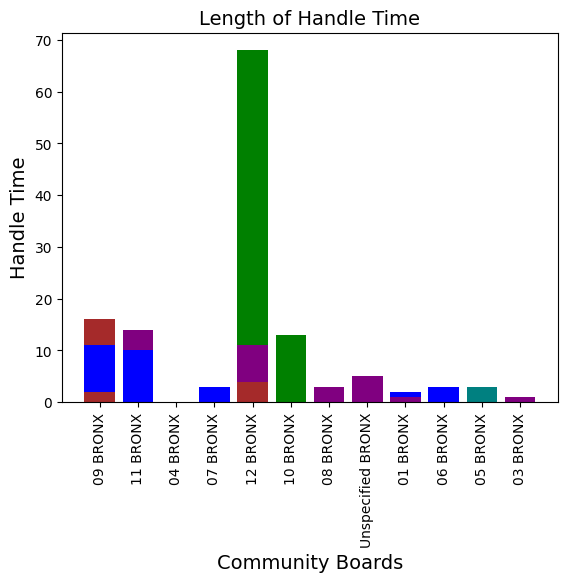

In [54]:
colors = ['green','blue','purple','brown','teal']
plt.bar(dfStatus['community_board'], dfStatus['handling_time'], color=colors)
plt.title('Length of Handle Time', fontsize=14)
plt.xlabel('Community Boards', fontsize=14)
plt.ylabel('Handle Time', fontsize=14)
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()